## Exercise 1
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million
lives each year, which accounts for 31% of all deaths worlwide. This dataset contains the medical records of
299 patients who had heart failure, collected during their follow-up period, where each patient profile has 12 clinical features.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more
risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/
heart_failure_clinical_records_dataset.csv')
data_np = np.array(data)
A = data_np[:,:-1].astype(np.float64).T # matrix containing the data (num features x num patients)
labels = data_np[:,-1].astype(np.int32) # outcomes (0 = alive; 1 = death)
```
1. How many patients are associated with good and with bad outcome, respectively?
2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of the following
quantities and comment the results:
    - the singular values $\sigma_k$;
    - the cumulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$;
    - the fraction of the “explained variance” $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$;
3. Generate a scatterplot of the first two principal components of the dataset, grouped by label; in light of
the scatterplot:
    - Which one of the first two principal components correlates most with the outcome?
    - Is a bad outcome associated with a positive or negative value of the principal component you chose
at point 3.1. ?
    - Propone a risk predictor based on the sign of the principal component you chose at point 3.1. .
    - Based on the risk predictor of point 3.3., compute the number of true positives (T P ), false positives
(F P ), true negatives (T N ) and false negatives (F N ).
    - Compute the following quantities:
        * sensitivity: (T P )/(T P + F N );
        * specificity: (T N )/(T N + F P );
        * accuracy: (T P + T N )/(T P + T N + F P + F N ).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
data_np = np.array(data)
A = data_np[:,:-1].astype(np.float64).T # matrix containing the data (num features x num patients)
labels = data_np[:,-1].astype(np.int32) # outcomes (0 = alive; 1 = death)

1. How many patients are associated with good and with bad outcome, respectively?

In [45]:
alive_indexes = [i for i in range(len(labels)) if labels[i]==0]
dead_indexes = [i for i in range(len(labels)) if labels[i]==1]

print('Total patients are: ', len(labels))
print('Patient associated with good outcome are: ', len(alive_indexes))
print('Patient associated with bad outcome are: ', len(dead_indexes))

Total patients are:  299
Patient associated with good outcome are:  203
Patient associated with bad outcome are:  96


2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of the following
quantities and comment the results:
    - the singular values $\sigma_k$;
    - the cumulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$;
    - the fraction of the “explained variance” $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$;

In [46]:
# use the convention to have features on the columns and each row is a patient
A = A.T

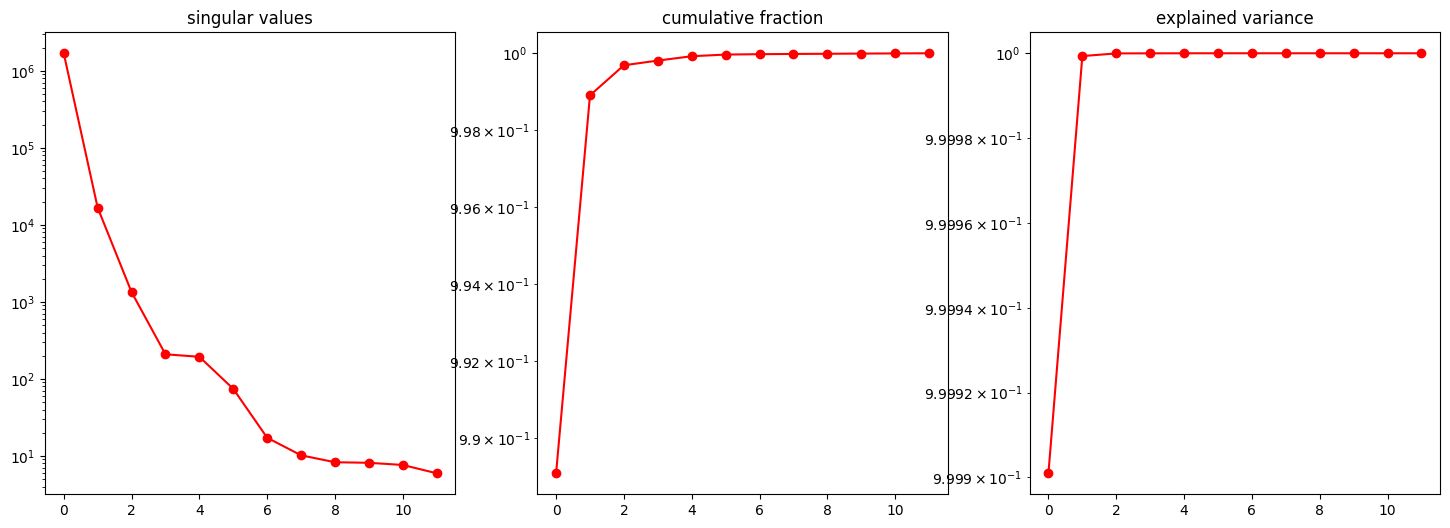

In [47]:
# center the matrix
A_mean = A.mean(axis=0)
A_centered = A - A_mean[None,:]

# perform singular value decomposition
U, s, VT = np.linalg.svd(A_centered)

# setup the plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

# plot the singular values
axes[0].semilogy(s, 'o-', color = 'red')
axes[0].set_title('singular values')

# plot the cumulative fraction of singular values
axes[1].semilogy(np.cumsum(s)/np.sum(s), 'o-',  color = 'red')
axes[1].set_title('cumulative fraction')

# plot the explained variance
axes[2].semilogy(np.cumsum(s**2)/np.sum(s**2), 'o-',  color = 'red')
axes[2].set_title('explained variance')

# show the plot
plt.show()

We can see that the first singular value already explain almost all the variance. We can see that that the order of magnitude of the singular values quickly decrease, so we have a first singular value in the order of $10^6$, the second in the order of $10^4$, the third in the order of $10^3$ and the fourth of $10^2$. We have a quinckly decrease of over one order of magnitude between each singular value.
The strong dominance or a single singular value may suggest us that performing a standardization operation may provide more interesting results.

3. Generate a scatterplot of the first two principal components of the dataset, grouped by label; in light of
the scatterplot:
    - Which one of the first two principal components correlates most with the outcome?
    - Is a bad outcome associated with a positive or negative value of the principal component you chose
at point 3.1. ?
    - Propone a risk predictor based on the sign of the principal component you chose at point 3.1. .
    - Based on the risk predictor of point 3.3., compute the number of true positives (T P ), false positives
(F P ), true negatives (T N ) and false negatives (F N ).
    - Compute the following quantities:
        * sensitivity: (T P )/(T P + F N );
        * specificity: (T N )/(T N + F P );
        * accuracy: (T P + T N )/(T P + T N + F P + F N ).

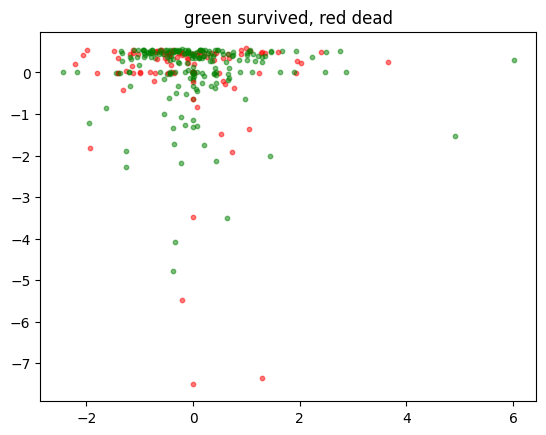

In [48]:
x = A_standarized @ VT.T[:,0]
y = A_standarized @ VT.T[:,1]

for i in range(len(A_standarized)):
    if i in alive_indexes:
        col = 'green'
    else:
        col = 'red'
    plt.scatter(x[i], y[i], marker='o', color=col, s=10, alpha=0.5)
plt.title('green survived, red dead')
plt.show()

The data is very centered with a few outliers. There is not a clear distinction between the two outcome.
In any case I would propose a risk predictor based on the sign of over the second principal direction. If the sign is negative the outcome is likely 1, if the sign is positive it is likely 0

In [49]:
# define the predictor
def predictor(x, V):
    return x @ V[:,1] < 0

# calculate TP, TN, FP, FN indicators
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(A_centered)):
    pred = predictor(A_centered[i], VT.T)
    if pred == 1:
        if labels[i] == pred:
            TP += 1
        else:
            FP += 1
    else:
        if labels[i] == pred:
            TN += 1
        else:
            FN += 1

print('Sensitivity: ', TP/(TP+FN))
print('Specificity: ', TN/(TN + FP))
print('Accuracy: ', (TP+TN)/(TP+TN+FP+FN))

Sensitivity:  0.3333333333333333
Specificity:  0.6748768472906403
Accuracy:  0.5652173913043478


The obtained results are pretty poor becouse the first principal components doesn't seem to correlate with the outcame.

In order to give more importance to other components and given that the column of A seem to have different unit of measure due to an obvious difference in their scale I proceed with a standardization of the dataset prior to the other analysis.
This is not the standard approach to perform PCA, however it may improve performance of classification tecniques. What we are doing is perform PCA on a modified dataset different from the original one, having unitary standard deviation on all features.

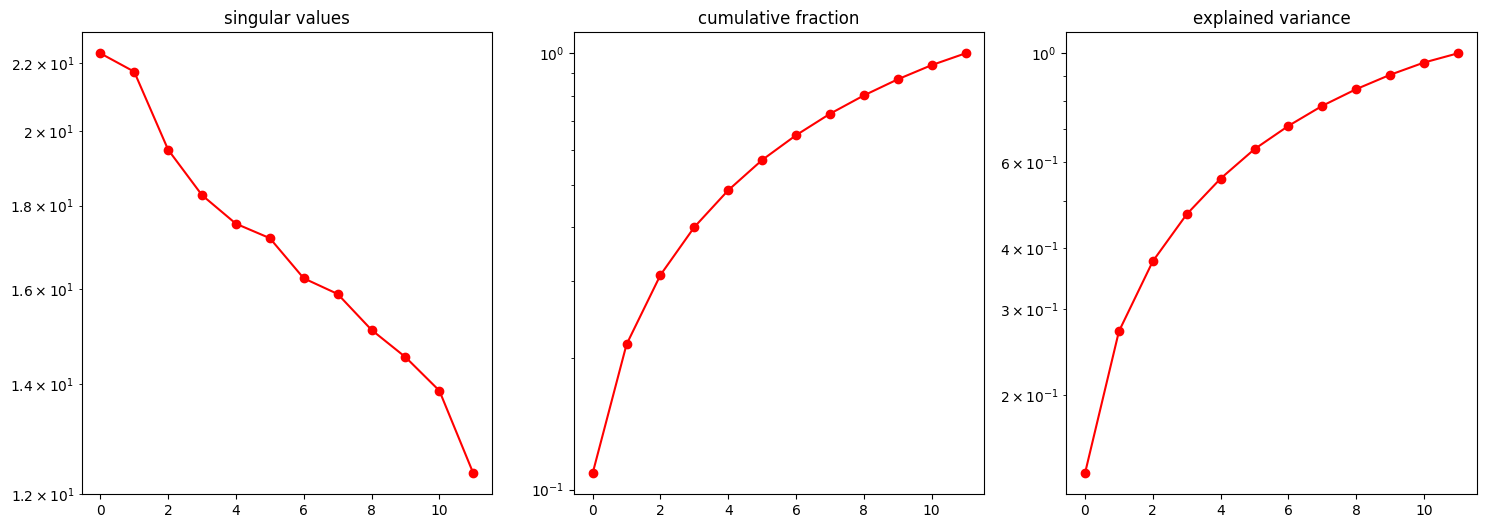

In [50]:
# standardization
A_std = A_centered.std(axis=0)
A_normalized = [A_centered[:,i]/A_std[i] for i in range(A_centered.shape[1])]
A_normalized=np.array(A_normalized).T

# perform singular value decomposition
U_s, s_s, VT_s = np.linalg.svd(A_normalized)

# setup the plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

# plot the singular values
axes[0].semilogy(s_s, 'o-', color = 'red')
axes[0].set_title('singular values')

# plot the cumulative fraction of singular values
axes[1].semilogy(np.cumsum(s_s)/np.sum(s_s), 'o-',  color = 'red')
axes[1].set_title('cumulative fraction')

# plot the explained variance
axes[2].semilogy(np.cumsum(s_s**2)/np.sum(s_s**2), 'o-',  color = 'red')
axes[2].set_title('explained variance')

# show the plot
plt.show()

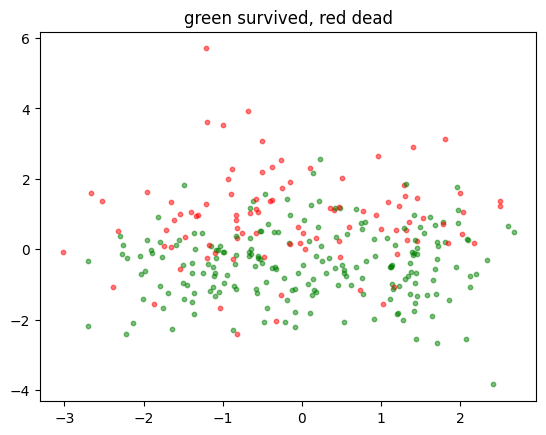

In [51]:
x = A_normalized @ VT_s.T[:,0]
y = A_normalized @ VT_s.T[:,1]

for i in range(len(A_centered)):
    if i in alive_indexes:
        col = 'green'
    else:
        col = 'red'
    plt.scatter(x[i], y[i], marker='o', color=col, s=10, alpha=0.5)
plt.title('green survived, red dead')
plt.show()

Now the data seem more spread and we can actually see a difference in the density of alive and dead on the second principal component.

Given this difference in density I propose a risk predictor based on the sign of over the second principal direction.
If the sign is positive the outcome is likely 1, if the sign is negative it is likely 0

In [52]:
# define the predictor
def predictor(x, V):
    return x @ V[:,1] > 0

# calculate TP, TN, FP, FN indicators
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(A_normalized)):
    pred = predictor(A_normalized[i], VT_s.T)
    if pred == 1:
        if labels[i] == pred:
            TP += 1
        else:
            FP += 1
    else:
        if labels[i] == pred:
            TN += 1
        else:
            FN += 1

print('Sensitivity: ', TP/(TP+FN))
print('Specificity: ', TN/(TN + FP))
print('Accuracy: ', (TP+TN)/(TP+TN+FP+FN))

Sensitivity:  0.8229166666666666
Specificity:  0.6748768472906403
Accuracy:  0.7224080267558528


In this case the obtained result is much better than before. To privide further comparison we can calculate the results with the naive predictor which simply assumes that all people survive (prominent feature in the dataset)

In [53]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(A_normalized.shape[0]):
    pred = 0
    if labels[i] == 0:
        TN += 1
    else:
        FN += 1

print('Sensitivity: ', TP/(TP+FN))
print('Specificity: ', TN/(TN + FP))
print('Accuracy: ', (TP+TN)/(TP+TN+FP+FN))

Sensitivity:  0.0
Specificity:  1.0
Accuracy:  0.6789297658862876


The accuracy of this predictor is indeed better that the one calculated in the first point proving once again the poor performance onìf the latter.
The second proposed predictor instead is only slightly better than the naive one, proving that it is also far from optimal

## Exercise 2
Consider the Rosenbrock function

$$f (x, y) = 100(y − x^2 )^2 + (1 − x)^2 $$

1. Compute the gradient ∇f and the Hessian of f. Prove that the function has a unique minimizer $x^*$ and
compute it.
2. Apply the Gradient Descent method with fixed learning rate (η) to find the minimum of f . Explore the
effect of different values of η and different starting points. Comment on the results.

1. Compute the gradient ∇f and the Hessian of f. Prove that the function has a unique minimizer $x^*$ and
compute it.

In [60]:
import jax
import jax.numpy as jnp
import sympy as sym

def f(X):
    return 100*(X[1]-X[0]**2)**2+(1-X[0])**2

x_sym = sym.Symbol('x', real = True)
y_sym = sym.Symbol('y', real = True)
f_sym = 100*(y_sym - x_sym**2 )**2 + (1 - x_sym)**2

In [55]:
print('gradient is: ') 
gradient = sym.Matrix([f_sym]).jacobian([x_sym, y_sym])
gradient

gradient is: 


Matrix([[-400*x*(-x**2 + y) + 2*x - 2, -200*x**2 + 200*y]])

In [56]:
print('hessian is: ')
hessian = sym.hessian(f_sym, [x_sym, y_sym])
hessian

hessian is: 


Matrix([
[1200*x**2 - 400*y + 2, -400*x],
[               -400*x,    200]])

In [57]:
eigenvals = sym.hessian(f_sym, [x_sym, y_sym]).eigenvals()
eigenvals

{600*x**2 - 200*y - sqrt(360000*x**4 - 240000*x**2*y + 41200*x**2 + 40000*y**2 + 39600*y + 9801) + 101: 1,
 600*x**2 - 200*y + sqrt(360000*x**4 - 240000*x**2*y + 41200*x**2 + 40000*y**2 + 39600*y + 9801) + 101: 1}

In [58]:
for eigenvalue in eigenvals:
    print(sym.solve(eigenvalue, x_sym, y_sym))

[(-sqrt(400*y - 2)/20, y), (sqrt(400*y - 2)/20, y)]
[(-sqrt(400*y - 2)/20, y), (sqrt(400*y - 2)/20, y)]


The Rosenbrock is non-convex because it's hessian is not positive definite. So we cannot say anything yet.

However we can procede with a simpler approach to prove that exist a single global minimum.
Is it trivial to see that the function is the sum of two positive terms so we can easily assume that the function is always grater than 0.
If we found a single point in which the function is equal to 0 than we have proved that the function has a single minima.
The only case in which the sum of two squared term is equal to 0 is when both of them are equal to zero.

$f(x,y) = 0 \ \ \ \ implies \ \ \ \ \ \begin{cases}
      y-x^2 = 0\\
      1-x = 0
    \end{cases}$

so from the second equation we impose $x=1$ and subtituting in the first equation we forcefully get $y=1$ .
So we obtain that the function has is alway greater or equal than 0 and x,y = (1,1) is the only point where it assume value 0.
This means that (x,y) = (0,0) is the absolute minimum of the function

In [61]:
# Using sympy we can calculate all critical points
critical_points = sym.solve(gradient, [x_sym, y_sym])
critical_points

[(1, 1)]

In [65]:
# We can use the Hessian to determine the nature of the critical points
for point in critical_points:
	hessian_at_point = hessian.subs({x_sym: point[0], y_sym: point[1]})
	eigenvals = hessian_at_point.eigenvals()
	print('point: ', point)
	print('eigenvalues: ', eigenvals)
	pos = 0
	neg = 0
	for eigenvalue in eigenvals:
		if eigenvalue > 0:
			pos += 1
		else:
			neg += 1
	if pos == len(eigenvals):
		print('local minimum')
	elif neg == len(eigenvals):
		print('local maximum')
	else:
		print('saddle point')

point:  (1, 1)
eigenvalues:  {501 - sqrt(250601): 1, sqrt(250601) + 501: 1}
local minimum


2. Apply the Gradient Descent method with fixed learning rate (η) to find the minimum of f . Explore the
effect of different values of η and different starting points. Comment on the results.

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

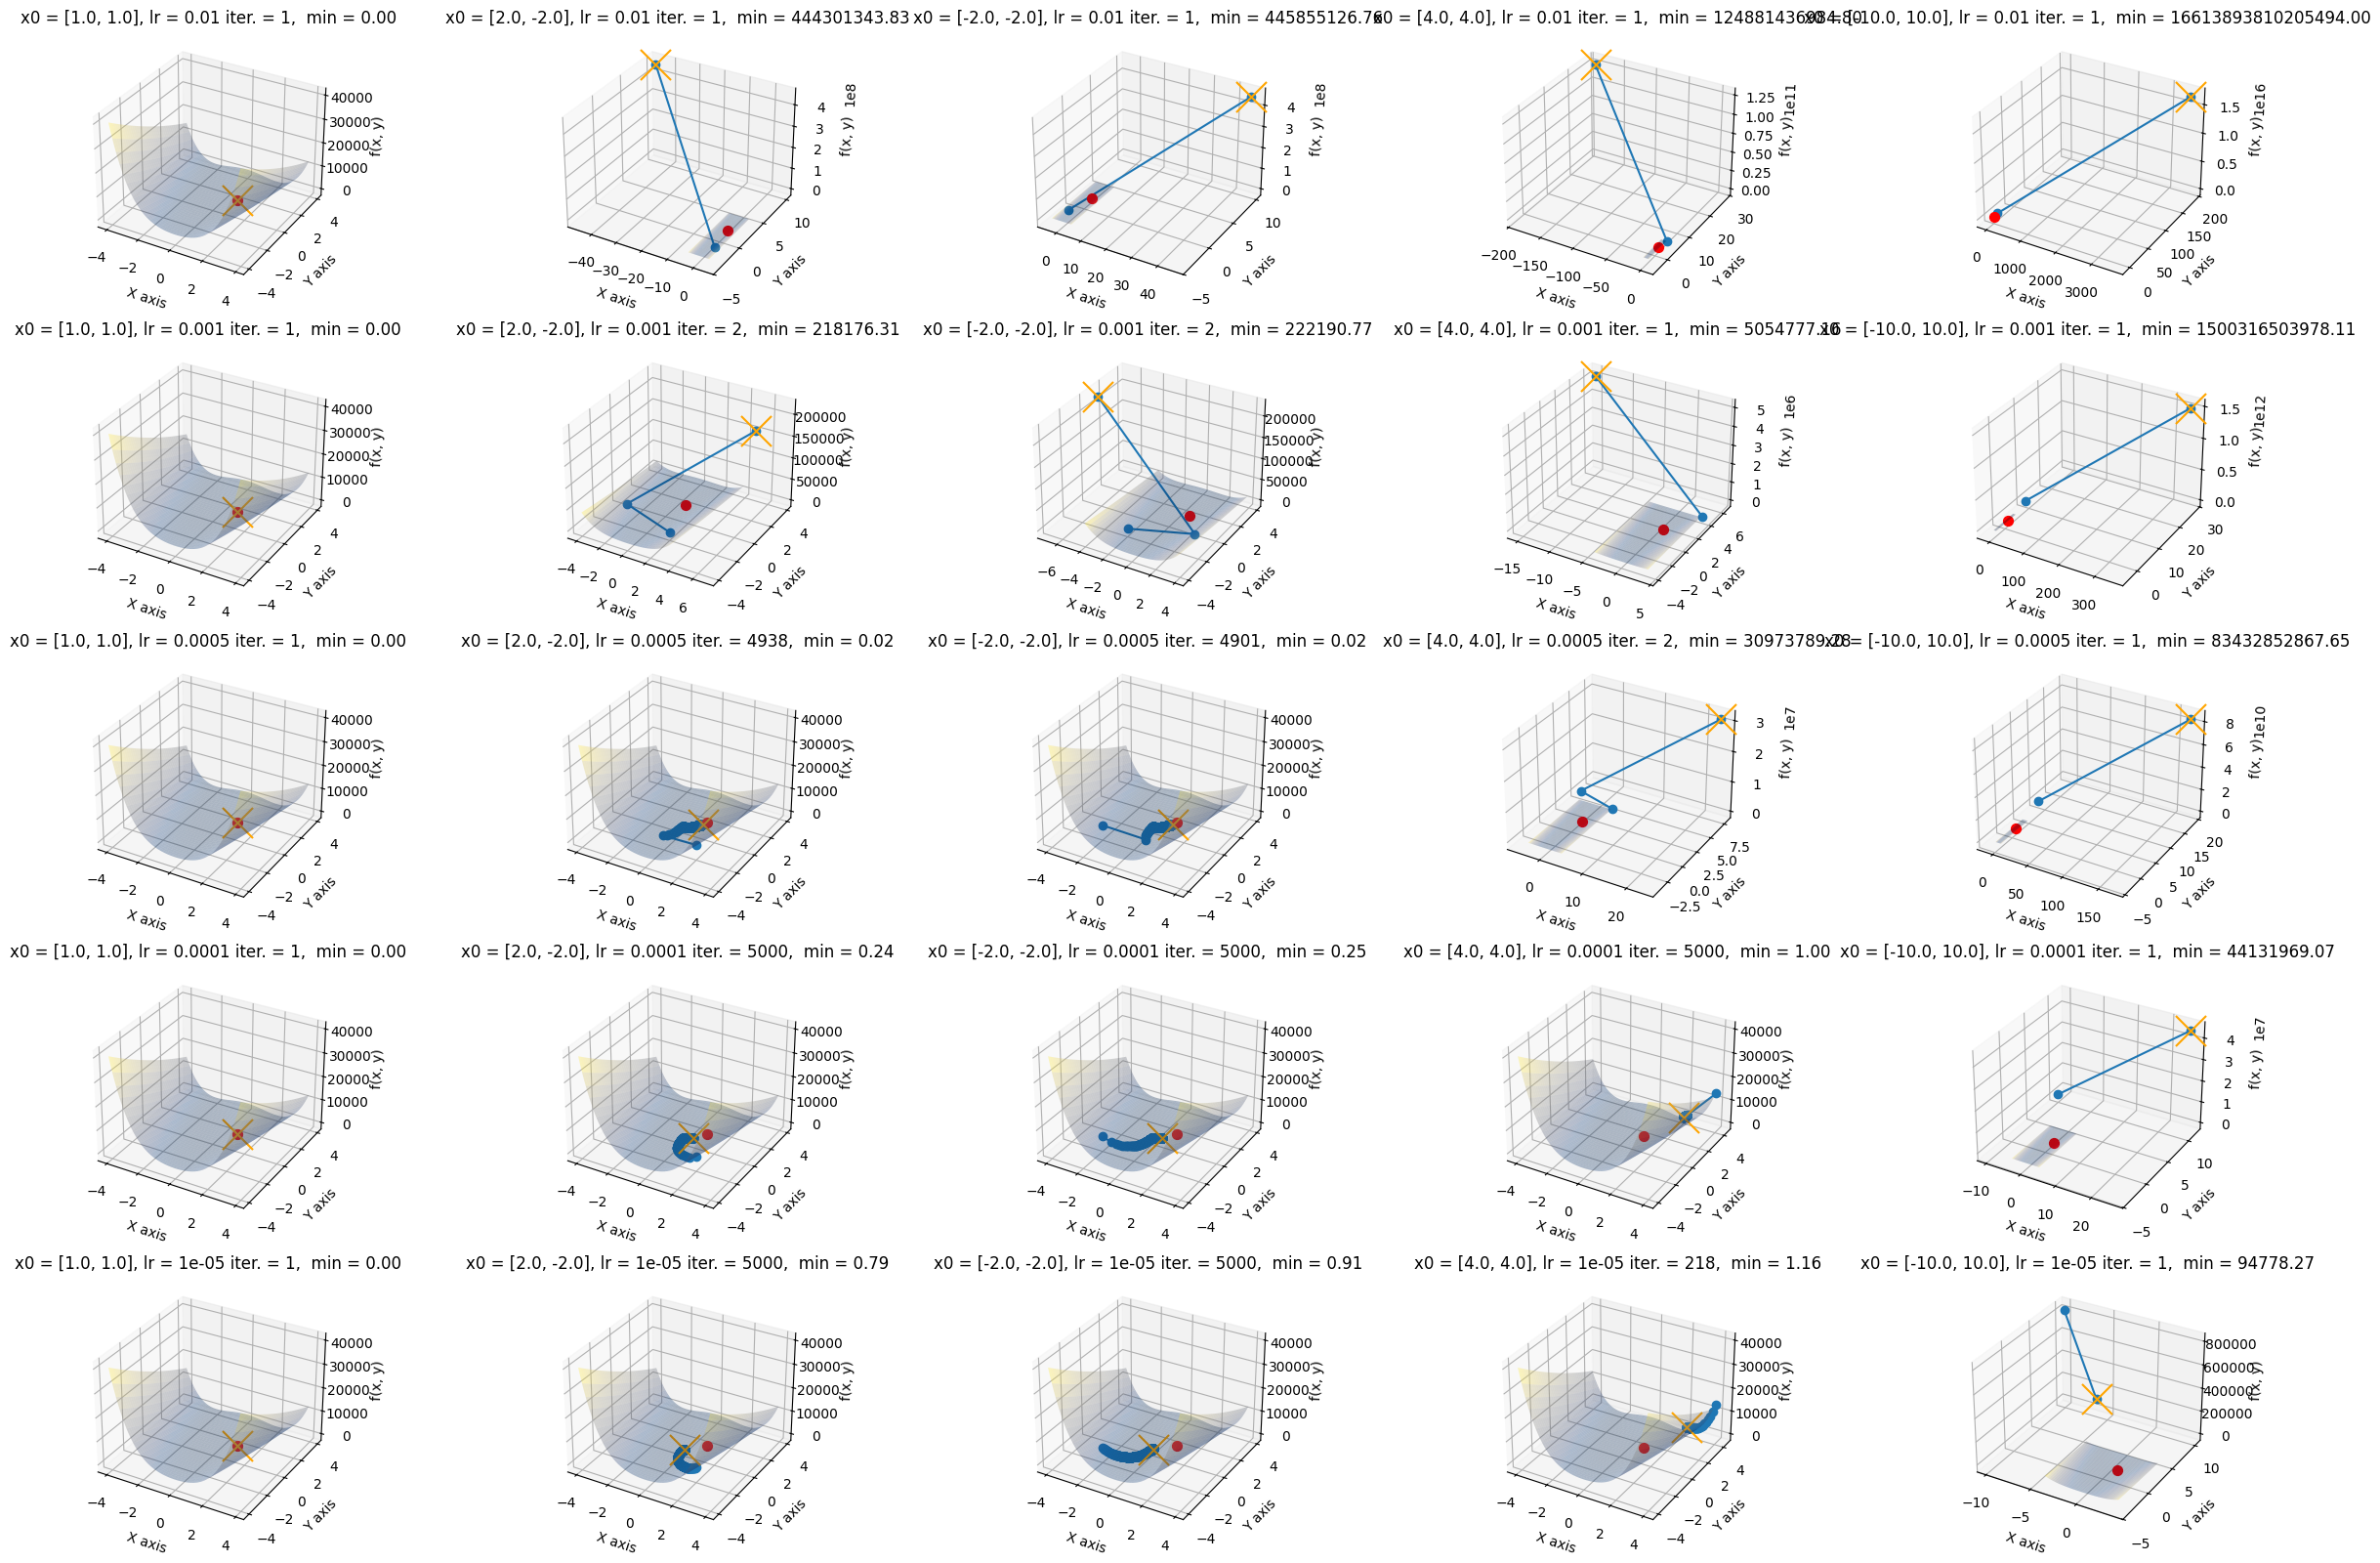

In [69]:
def GD(X, f, eta, maximum_iterations=5000, epsilon=1e-5, divergence=1e5):
    grad = jax.jit(jax.grad(f, argnums=0))
    Xi = X
    history = [[Xi[0], Xi[1], f(Xi)]]
    for i in range(maximum_iterations):
        Xprev = Xi
        Xi = Xi - eta*np.array(grad(Xi))
        history.append([Xi[0], Xi[1], f(Xi)])
        if np.abs(f(Xi)-f(Xprev))<epsilon:
            break
        if np.abs(f(Xi)-f(Xprev))>divergence:
                break
    return np.array(history)

starting_points = [[1.,1.],[2.,-2.],[-2.,-2.], [4.,4.], [-10.,10.]]
etas = [1e-2, 1e-3, 5e-4, 1e-4, 1e-5]

from tqdm.notebook import tqdm



fig = plt.figure(figsize=(30,20))
x0 = np.arange(-4,4, 0.1)
y0 = np.arange(-4,4, 0.1) 
X, Y = np.meshgrid(x0, y0)

X, Y = np.meshgrid(x0, y0)
Z = f([X, Y])


for i in range(len(etas)):
    for j in tqdm(range(len(starting_points))):
        history = GD(starting_points[j], f, etas[i])

        axs = fig.add_subplot(len(etas), len(starting_points), len(starting_points)*i + j+1, projection='3d')
        axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.3)

        axs.set_xlabel('X axis')
        axs.set_ylabel('Y axis')
        axs.set_zlabel('f(x, y)')
        axs.plot(history[:,0], history[:,1], history[:,2], 'o-')
        axs.scatter(1, 1, f([1,1]), color='red', s=50)
        axs.scatter(history[-1,0], history[-1,1], history[-1,2], marker='x', color='orange', s=500)
        axs.set_title(f'x0 = {starting_points[j]}, lr = {etas[i]} iter. = {len(history)-1},  min = {"{:.2f}".format(f(history[-1,0:2]))}')
plt.show()

The alghoritm easily diverges, this is due to the fact that the given function is non-convex and not lipschitz continuous. 
This implies that GD method does not have any guarantee to converge. 
In particular the gradient easily assumes high values becaus Rosenbrock function is a polynomial of degree 4 in x so it bacame much steeper than any quadratic function.

We can see that only for low values of the learning rate and a starting point already close to the optimum we can get acceptable results.


---

# Exercise 3

Consider the neural network N defined by the following composite function:

$ N(x) = C(ReLU (B(ReLU (Ax))))$

where:

 - ReLU is applied componentwise
 - $A, B ∈ R^{50×50}$
 - $C ∈ R^{5×50}$

1. For the given matrices A, B and C what are the dimensions of the input and output of the neural network N ? Can the output be seen as a vector of probabilities ?
2. Consider the softmax function: <br>
    $$
        softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^n{e^{x_j}}} 
    $$ <br>
    for i ∈ {1, . . . , n}.<br>
    For the given matrices A, B and C what are the dimensions of the input and output of the neural network softmax(N)? <br> Can the output be seen as a vector of probabilities ?
3. If N is a classifier, for how many classes does it work?
4. Assume N has been trained and you want to use it to for classification on an input x. Do you use softmax(N ) or N ? Justify your answer.

### Answer:

1. For the given matrices A, B and C what are the dimensions of the input and output of the neural network
N ? Can the output be seen as a vector of probabilities?

Given that we compute A@x then the dimension of x is the same as the number of column of A. So the input is such that: $x \in R^{50}$.
The output instead is obtained as the product of C times a 50x50 matrix. Given that $ C \in R^{5x50}$ we get that $output \in R^5$

The output cannot be seen as a vector probability becouse is the linear combination of unbounded terms when positives that has no garantee about being lower than 1 for all inputs and no guarantee that sum of the output will be equal to 1. 

2. Consider the softmax function: <br>
$$
    softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^n{e^{x_j}}} 
$$ <br>
for i ∈ {1, . . . , n}.<br>
For the given matrices A, B and C what are the dimensions of the input and output of the neural network softmax(N)? <br> Can the output be seen as a vector of probabilities ?

Applying the softmax function does not change the dimensionality of the input nor the one of the output. This means that $input \in R^{50}$ and $output \in R^5$.

The main change is that the softmax function applied at the output layer of a NN allow to interpret the results as a vector of probabilities with values in [0:1] and whose sum is exactly 1. 

These properties are direct consequence of the definition of softmax(x)

3. If N is a classifier, for how many classes does it work?

If N is a classifier, given that the output size is 5 than it could be emplyed to classify input into 5 different categories

4. Assume N has been trained and you want to use it to for classification on an input x. Do you use
softmax(N ) or N ? Justify your answer.

I would choose to use softmax(X) mainly due to the interpretability and the fact that the output is a vector of probabilities. This means that the output of the network provides a measure of the confidence of the network in its prediction. Nonetheless if we are only interested in the class predicted as the most probable we can simply take the argmax of the output of the network before the softmax, saving some computational resources.